# Classe Confusão Widget
Este elemento foi projetado para ajudar a extrapolar seus modelos decisões através de recursos visuais, como gráficos ou matrizes de confusão que vão mais aprofundada do que o `plot_confusion_matrix` padrão. Classe A confusão pode ser usado com ** ambas ** modelos tabulares e classificação de imagens. (Nota: Devido a widgets de não exportar bem, haverá imagens em vez mostrando a saída O código ainda estará lá embora para você correr.!)
Este widget foi desenvolvido para o ambiente regular, bem como Google Colaboratory (não afiliado na Fast.AI). Para aqueles que utilizam este último, um repositório está disponível [here](https://github.com/muellerzr/ClassConfusion)

---

## Imagens
Antes de usar o widget, precisamos terminar treinando nosso modelo e gerar um objeto [`ClassificationInterpretation`](/train.html#ClassificationInterpretation)

In [ ]:
from fastai.vision import *
from fastai.widgets import ClassConfusion

In [ ]:
path = untar_data(URLs.PETS)
path_img = path/'images'
fnames = get_image_files(path_img)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), 
                                   size=224, bs=64).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.066235,0.374091,0.109608,00:32
1,0.479194,0.318278,0.098106,00:28


construtor da classe da Confusão varia de acordo com o nosso caso de uso. Para Imagens ** **, estamos interessados ​​no `classlist`,` is_ordered`, e `variáveis ​​figsize`.
* `Interp`: Ou um objeto tabular ou ClassificationInterpretation Imagem
* `Classlist`: Aqui você passar na lista de classes que você está interessado em olhar. Dependendo se você tiver combinações específicas ou não quiser experimentar vai determinar como você passá-los. Se nós só queremos olhar para todas as combinações entre algumas aulas, podemos passar seus nomes de classe como uma matriz normal, `['Abyssinian', 'Bengal', 'Birman']`. If we want to pass in a specific combination or three, we pass them in as a list of arrays or tuples, `[('Abyssian', 'Bengal'), ( 'Bengala', 'Birman')] `. Aqui nós temos o que o nosso ** actual classe ** foi a primeira, ea ** previsão ** segundo.
* `Is_ordered`:. Isto irá determinar se para gerar todas as combinações do conjunto de nomes que passaram em Se você tem um conjunto listado específico de combinações, queremos` is_ordered` para ser verdade.
* `Figsize`: Esta é uma tupla para o tamanho que você quer suas fotos para regresso se. O padrão é (8,8)
Além disso, quando você chamar a função, ele irá pedir um `valor k`. `K` é o mesmo que` k` do `plot_top_losses`, que é o número de imagens que você deseja olhar.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Vejamos um exemplo definido para o 'Ragdoll', 'Birman', e as classes 'Maine_Coon'

In [ ]:
classlist = ['Ragdoll', 'Birman', 'Maine_Coon']
ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see: 5


100%|██████████| 4/4 [00:54<00:00, 12.22s/it]


<Figure size 432x288 with 0 Axes>

![](https://i.imgur.com/jAE6BVm.png)

A saída é agora nossas imagens confusas, bem como seus nomes, no caso queremos ir encontrar os casos particulares.
Em seguida, vamos olhar para um conjunto de classes em uma ordem específica.

In [ ]:
classlist = [('Ragdoll', 'Birman'), ('British_Shorthair', 'Russian_Blue')]
ClassConfusion(interp, classlist, is_ordered=True)

![](https://i.imgur.com/EFLUEnQ.png)

Agora nós estamos olhando para as células exatas do nosso Confusão Matrix!

---

## tabular
Tabular tem um pouco mais sinos e assobios do que as imagens faz. Nós vamos olhar para o `conjunto de dados ADULT_SAMPLE` para um exemplo.
Junto com os itens do construtor padrão acima, existem mais dois, `cut_off` e` varlist`:
* `Cut_off`: Este é o número de corte, um número inteiro, para traçar as variáveis ​​categóricas. Ele define um máximo de 100 bars no gráfico num dado momento, então ele irá mostrar um defaulty `Número de valores é acima 100` messege, e passar para o próximo conjunto.
* `Varlist`: Esta é uma lista de variáveis ​​que você quer especificamente para olhar. Padrão Classe Confusão usará cada variável que foi utilizado no modelo, incluindo `NAS.

In [ ]:
from fastai.tabular import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [ ]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [ ]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [ ]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [ ]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.358833,0.381552,0.810000,00:16


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

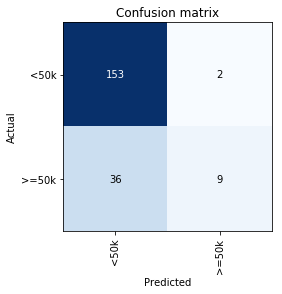

In [ ]:
interp.plot_confusion_matrix()

Com problemas tabulares, olhando um para o * indivíduo * fileira provavelmente não vai nos ajudar muito. Em vez disso o que ** Classe Confusão ** vai fazer é trama toda variável em qualquer combinação que ditam, e podemos ver como o distrobution dessas variáveis ​​em nossos erros mudou em relação à nossa distribuição global de conjunto de dados. Por exemplo, vamos explorar `> = 50k` e` <50k`

In [ ]:
ClassConfusion(interp, ['>=50k', '<50k'], figsize=(12,12))

100%|██████████| 10/10 [00:06<00:00,  1.26it/s]


<Figure size 432x288 with 0 Axes>

![](https://i.imgur.com/iUUSp2A.png)

Agora podemos ver os distrobutions para cada uma dessas duas caixas perdidas em nossa matriz de confusão, e olhar para o que realmente está acontecendo lá. Se olharmos para a educação, podemos ver que há muitos momentos em que pensei que as pessoas estavam fazendo acima ou abaixo 50k, eles eram muitas vezes graduados do ensino médio e persuing algum diploma universitário.


Podemos também olhar para a distribuição por categorias contínuas também. Mostrado abaixo é `age`:

In [ ]:
ClassConfusion(interp, ['>=50k', '<50k'], figsize=(12,12))

100%|██████████| 10/10 [00:06<00:00,  1.29it/s]


<Figure size 432x288 with 0 Axes>

![](https://i.imgur.com/jMiTb3y.png)

Se quisermos olhar para variáveis ​​específicas, passamos-los em `varlist`. Abaixo está `age`,` education`, e `relationship`:

In [ ]:
ClassConfusion(interp, ['>=50k', '<50k'], varlist=['age', 'education', 'relationship'],
               figsize=(12,12))

100%|██████████| 3/3 [00:01<00:00,  1.40it/s]


<Figure size 432x288 with 0 Axes>

![](https://i.imgur.com/ZIqwljr.png)

Podemos traçar a distribuição para os nossos verdadeiros positivos, bem como, se quisermos comparar aqueles usando histogramas:

In [ ]:
ClassConfusion(interp, [['>=50k', '>=50k'], ['>=50k', '<50k']], varlist=['age', 'education', 'relationship'],
               is_ordered=True, figsize=(12,12))

100%|██████████| 3/3 [00:01<00:00,  1.49it/s]


<Figure size 432x288 with 0 Axes>

![](https://i.imgur.com/xNUUPz0.png)